# **Page View Time Series Visualizer Assignment**
For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:
*   Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
*   Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
*   Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
*   Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
*   Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from datetime import datetime

register_matplotlib_converters()

In [4]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
def parse_date(x):
    return datetime.strptime(x, "%Y-%m-%d")

df = pd.read_csv('https://raw.githubusercontent.com/AlisterBaroi/page-view-time-series-visualizer/main/fcc-forum-pageviews.csv?token=GHSAT0AAAAAABSGSVKMRJGFN7MXSRAH2YIGYSTZ4OQ',
                 parse_dates=['date'],
                 date_parser=parse_date)
df = df.set_index('date')

In [5]:
# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025))
        & (df['value'] <= df['value'].quantile(0.975))]

In [6]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(16, 5))
    ax = sns.lineplot(data=df, x='date', y='value', color='red')
    ax.set(xlabel='Date', ylabel='Page Views')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

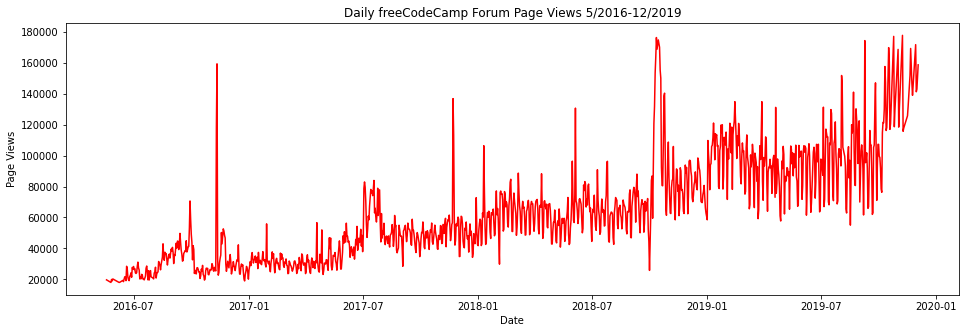

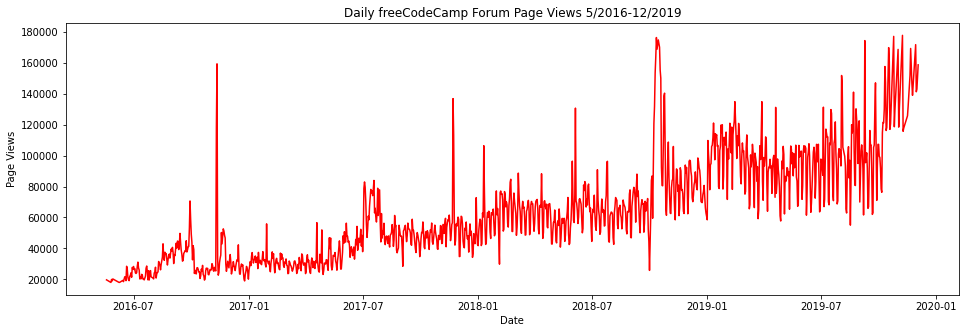

In [9]:
draw_line_plot()

In [7]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
    df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
  
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean()
    df_bar = df_bar.unstack()

    months = ["January","February","March","April","May","June","July","August","September","October","November","December"]

    # Draw bar plot
    fig = df_bar.plot(kind='bar', figsize=(7,6)).figure
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months', labels=months)
  
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

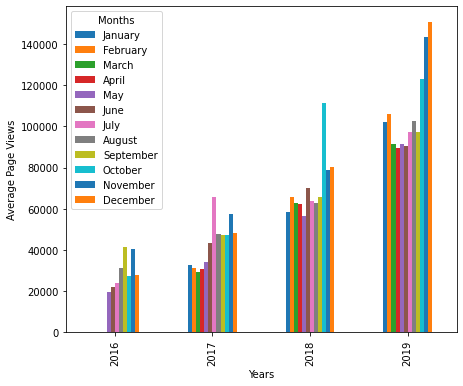

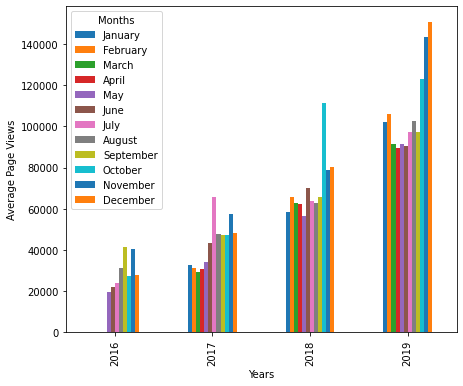

In [10]:
draw_bar_plot()

In [8]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
  
    sns.boxplot(data=df_box,ax=ax1,x=df_box["year"],y=df_box["value"])
    ax1.set(xlabel="Year",ylabel="Page Views", title="Year-wise Box Plot (Trend)")
  
    sns.boxplot(
        ax=ax2,
        data=df_box,
        x=df_box["month"],
        y=df_box["value"],
        order=[
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec",
        ],
    )
    ax2.set(xlabel="Month", ylabel="Page Views")
    ax2.set_title("Month-wise Box Plot (Seasonality)")

    y_ticks = [
        "0",
        "20000",
        "40000",
        "60000",
        "80000",
        "100000",
        "120000",
        "140000",
        "160000",
        "180000",
        "200000",
    ]
        
    ax1.yaxis.set_major_locator(mticker.FixedLocator([int(s) for s in y_ticks]))
    ax1.set_yticklabels(y_ticks)

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

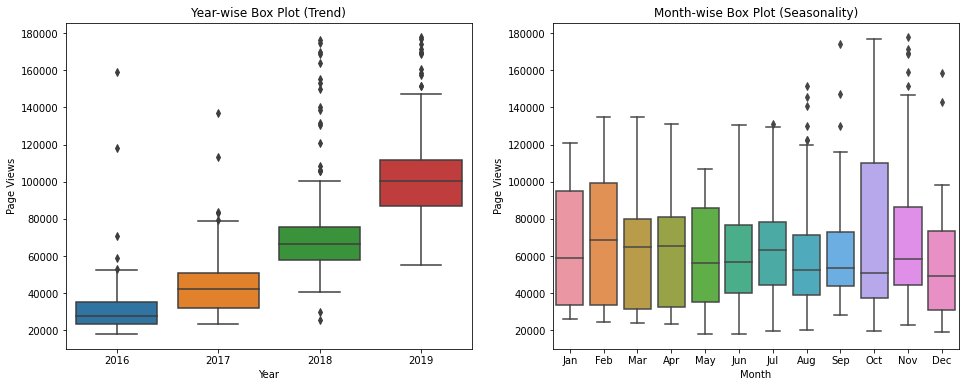

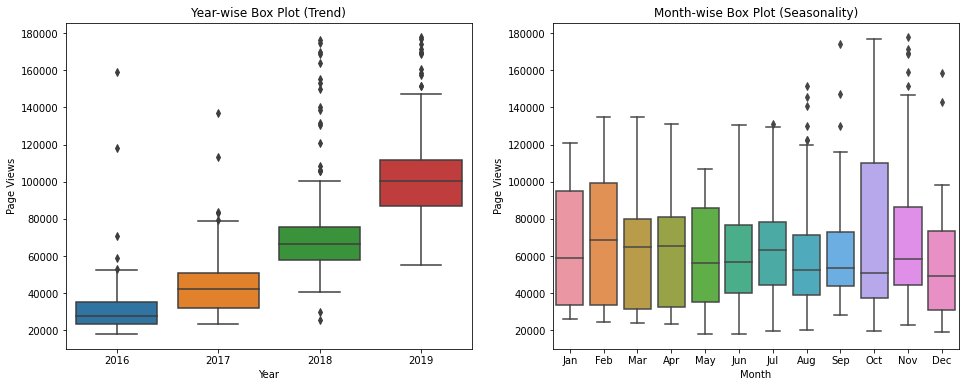

In [11]:
draw_box_plot()